## Objetivo: mapear as ações que o nosso código tem que ter para realizar a ESPCN nas imagens.

In [1]:
# Imports necessários
import tensorflow as tf

import os
import math
import pathlib
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

from IPython.display import display

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import PIL

2021-07-28 19:48:09.129915: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-28 19:48:09.129935: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Passo 1: Construção e Preparação do Dataset


Informações:
* Tamanho das imagens = 1024x1024

In [2]:
# Definição da pasta raiz = /src/images_train
current_dir = (pathlib.Path(__file__).absolute()).parents[2]
dir_raiz: str = r"{}/src/images_train".format(current_dir)
    
# Definição de algumas constantes usadas no programa
TAMANHO_RECORTE: int = 512
FATOR_UPSCALE: int = 3
TAMANHO_IMAGEM_ENTRADA = TAMANHO_RECORTE // FATOR_UPSCALE
LOTE: int = 8
EPOCAS: int = 100
PORCENTAGEM_VALIDACAO: float = 0.2

In [3]:
# Criação dos datasets: treino e validação
ds_treino = image_dataset_from_directory(
    directory=dir_raiz,
    batch_size=LOTE,
    image_size=(TAMANHO_RECORTE, TAMANHO_RECORTE),
    validation_split=PORCENTAGEM_VALIDACAO,
    color_mode="grayscale",
    subset="training",
    seed=1337,
    label_mode=None
)

ds_validacao = image_dataset_from_directory(
    directory=dir_raiz,
    batch_size=LOTE,
    image_size=(TAMANHO_RECORTE, TAMANHO_RECORTE),
    validation_split=PORCENTAGEM_VALIDACAO,
    color_mode="grayscale",
    subset="validation",
    seed=1337,
    label_mode=None
)

Found 500 files belonging to 1 classes.
Using 400 files for training.
Found 500 files belonging to 1 classes.
Using 100 files for validation.


2021-07-28 19:49:23.595330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-28 19:49:23.595354: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-28 19:49:23.595374: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dangelo-mint): /proc/driver/nvidia/version does not exist
2021-07-28 19:49:23.595642: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2021-07-28 19:49:36.589040: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-28 19:49:36.589682: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1999965000 Hz


tf.Tensor(
[[[ 28.25]
  [ 26.  ]
  [ 26.5 ]
  ...
  [ 96.25]
  [ 88.  ]
  [ 98.75]]

 [[ 22.75]
  [ 23.25]
  [ 24.5 ]
  ...
  [109.5 ]
  [ 98.5 ]
  [ 92.75]]

 [[ 24.75]
  [ 25.75]
  [ 24.25]
  ...
  [106.25]
  [106.5 ]
  [ 94.25]]

 ...

 [[218.75]
  [220.5 ]
  [222.5 ]
  ...
  [246.5 ]
  [241.75]
  [229.  ]]

 [[218.5 ]
  [220.25]
  [222.25]
  ...
  [247.5 ]
  [244.  ]
  [236.  ]]

 [[218.25]
  [220.5 ]
  [222.  ]
  ...
  [248.75]
  [245.5 ]
  [239.  ]]], shape=(512, 512, 1), dtype=float32)


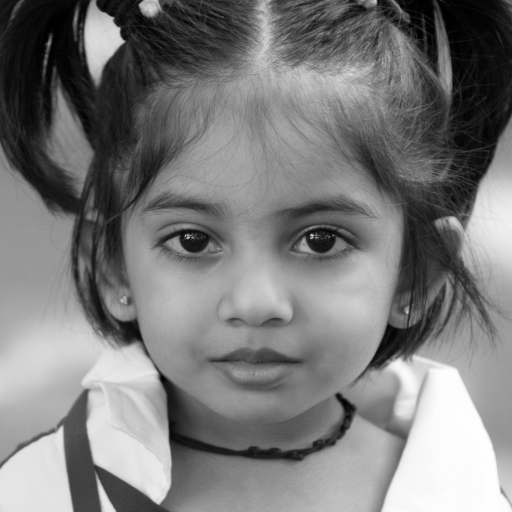

tf.Tensor(
[[[63.5 ]
  [67.25]
  [68.5 ]
  ...
  [67.75]
  [65.25]
  [64.25]]

 [[67.  ]
  [71.  ]
  [73.75]
  ...
  [70.5 ]
  [69.  ]
  [67.75]]

 [[74.  ]
  [75.75]
  [78.75]
  ...
  [72.75]
  [74.5 ]
  [77.75]]

 ...

 [[85.5 ]
  [85.5 ]
  [84.5 ]
  ...
  [45.  ]
  [30.25]
  [41.75]]

 [[85.75]
  [85.75]
  [84.  ]
  ...
  [47.5 ]
  [35.75]
  [39.5 ]]

 [[87.  ]
  [86.25]
  [85.75]
  ...
  [36.  ]
  [40.75]
  [39.25]]], shape=(512, 512, 1), dtype=float32)


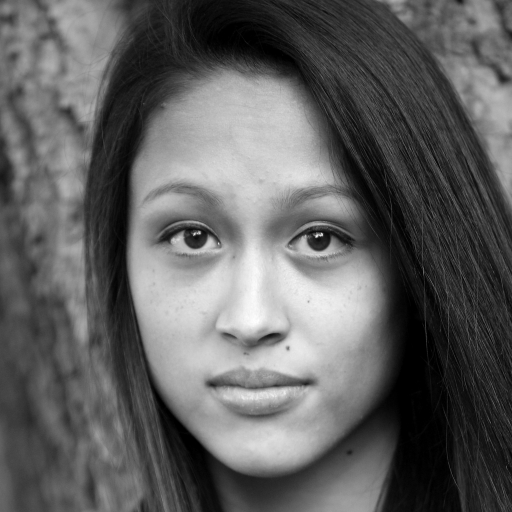

tf.Tensor(
[[[ 16.  ]
  [ 16.75]
  [ 19.5 ]
  ...
  [ 35.5 ]
  [ 41.  ]
  [ 39.5 ]]

 [[ 15.5 ]
  [ 18.75]
  [ 18.5 ]
  ...
  [ 34.5 ]
  [ 36.75]
  [ 38.  ]]

 [[ 17.5 ]
  [ 18.  ]
  [ 17.25]
  ...
  [ 36.75]
  [ 40.25]
  [ 38.25]]

 ...

 [[ 14.25]
  [ 14.75]
  [ 17.5 ]
  ...
  [ 97.75]
  [107.5 ]
  [106.75]]

 [[ 15.75]
  [ 14.75]
  [ 16.5 ]
  ...
  [104.  ]
  [110.  ]
  [109.  ]]

 [[ 15.25]
  [ 15.75]
  [ 15.25]
  ...
  [107.75]
  [112.  ]
  [105.  ]]], shape=(512, 512, 1), dtype=float32)


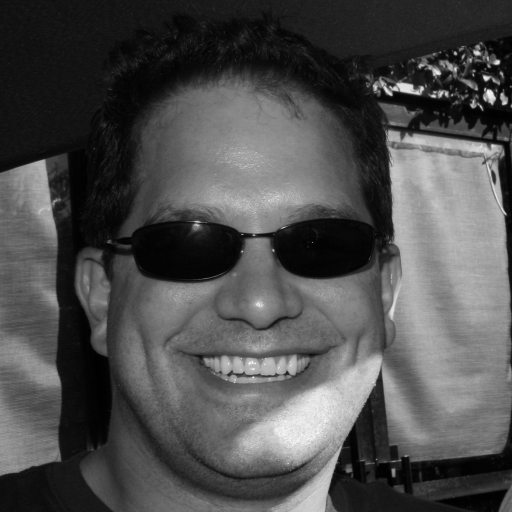

tf.Tensor(
[[[255.  ]
  [255.  ]
  [255.  ]
  ...
  [254.  ]
  [254.  ]
  [254.  ]]

 [[255.  ]
  [255.  ]
  [255.  ]
  ...
  [254.  ]
  [254.  ]
  [253.5 ]]

 [[255.  ]
  [255.  ]
  [255.  ]
  ...
  [254.  ]
  [254.  ]
  [253.5 ]]

 ...

 [[142.5 ]
  [161.  ]
  [180.  ]
  ...
  [178.75]
  [163.25]
  [157.25]]

 [[126.75]
  [148.25]
  [166.5 ]
  ...
  [174.75]
  [162.25]
  [151.  ]]

 [[106.  ]
  [134.  ]
  [157.75]
  ...
  [167.  ]
  [158.75]
  [147.75]]], shape=(512, 512, 1), dtype=float32)


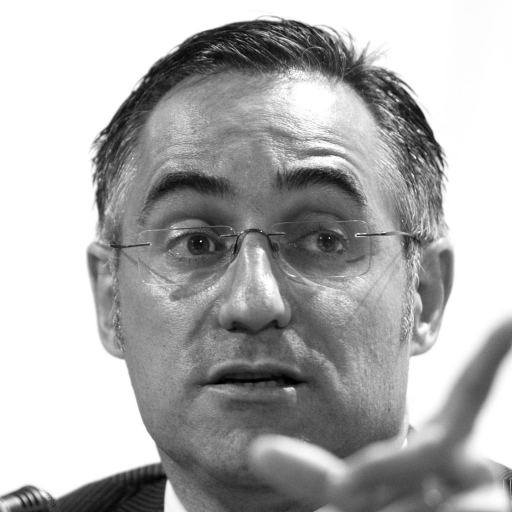

tf.Tensor(
[[[211.  ]
  [211.  ]
  [209.75]
  ...
  [210.  ]
  [210.  ]
  [210.  ]]

 [[211.  ]
  [211.  ]
  [210.  ]
  ...
  [210.  ]
  [210.  ]
  [210.  ]]

 [[211.  ]
  [211.  ]
  [210.  ]
  ...
  [210.  ]
  [210.  ]
  [210.  ]]

 ...

 [[212.  ]
  [211.5 ]
  [210.75]
  ...
  [213.  ]
  [213.  ]
  [213.  ]]

 [[212.  ]
  [211.75]
  [211.25]
  ...
  [213.  ]
  [213.  ]
  [213.  ]]

 [[212.  ]
  [212.25]
  [212.5 ]
  ...
  [213.5 ]
  [213.  ]
  [213.  ]]], shape=(512, 512, 1), dtype=float32)


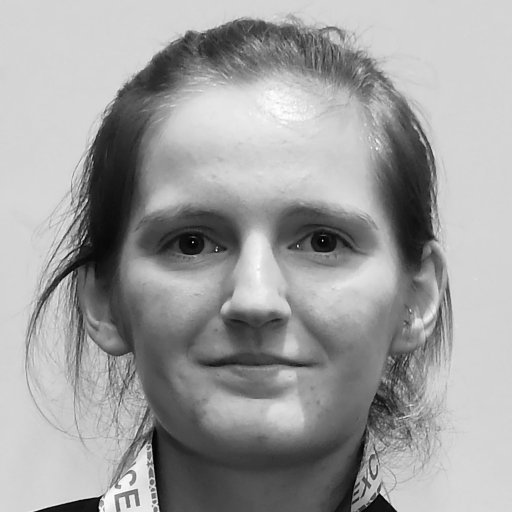

tf.Tensor(
[[[ 71.75]
  [ 70.5 ]
  [ 70.25]
  ...
  [ 94.25]
  [ 95.75]
  [ 94.5 ]]

 [[ 72.25]
  [ 71.25]
  [ 72.5 ]
  ...
  [ 94.75]
  [ 94.75]
  [ 96.  ]]

 [[ 74.  ]
  [ 71.75]
  [ 72.5 ]
  ...
  [ 98.  ]
  [ 96.  ]
  [ 95.  ]]

 ...

 [[221.75]
  [220.  ]
  [220.5 ]
  ...
  [ 99.5 ]
  [101.5 ]
  [102.  ]]

 [[220.75]
  [220.5 ]
  [220.  ]
  ...
  [100.  ]
  [101.25]
  [102.5 ]]

 [[221.25]
  [221.  ]
  [220.5 ]
  ...
  [101.25]
  [102.5 ]
  [103.  ]]], shape=(512, 512, 1), dtype=float32)


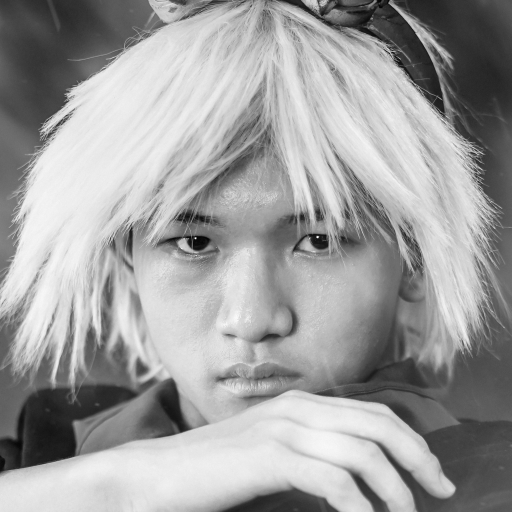

tf.Tensor(
[[[ 39.5 ]
  [ 42.5 ]
  [ 47.75]
  ...
  [ 79.  ]
  [ 84.5 ]
  [ 91.25]]

 [[ 40.25]
  [ 43.75]
  [ 49.  ]
  ...
  [ 87.75]
  [ 86.  ]
  [ 89.5 ]]

 [[ 40.5 ]
  [ 42.75]
  [ 46.25]
  ...
  [ 89.75]
  [ 86.75]
  [ 89.75]]

 ...

 [[207.75]
  [213.25]
  [215.25]
  ...
  [ 57.25]
  [ 47.25]
  [ 63.  ]]

 [[208.75]
  [212.5 ]
  [214.25]
  ...
  [ 80.5 ]
  [ 80.  ]
  [ 82.5 ]]

 [[207.75]
  [212.5 ]
  [214.  ]
  ...
  [ 73.25]
  [ 78.  ]
  [ 81.5 ]]], shape=(512, 512, 1), dtype=float32)


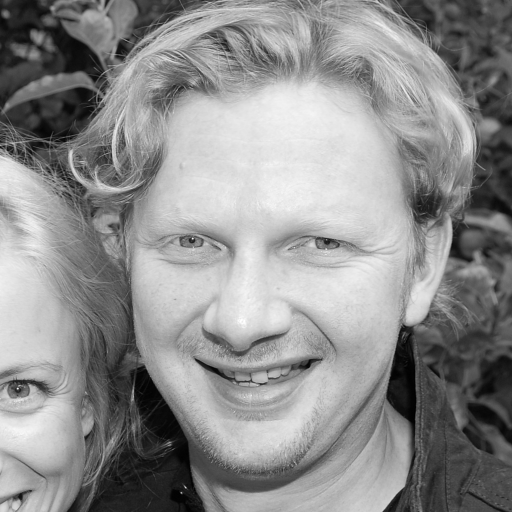

tf.Tensor(
[[[68.  ]
  [71.  ]
  [68.5 ]
  ...
  [67.25]
  [64.25]
  [65.5 ]]

 [[67.75]
  [70.25]
  [68.25]
  ...
  [65.  ]
  [63.25]
  [65.5 ]]

 [[66.25]
  [67.25]
  [67.  ]
  ...
  [65.5 ]
  [66.5 ]
  [66.5 ]]

 ...

 [[65.  ]
  [65.5 ]
  [63.5 ]
  ...
  [65.5 ]
  [69.25]
  [78.5 ]]

 [[65.  ]
  [64.5 ]
  [66.25]
  ...
  [65.5 ]
  [65.5 ]
  [67.25]]

 [[65.25]
  [64.75]
  [64.75]
  ...
  [67.  ]
  [68.  ]
  [68.75]]], shape=(512, 512, 1), dtype=float32)


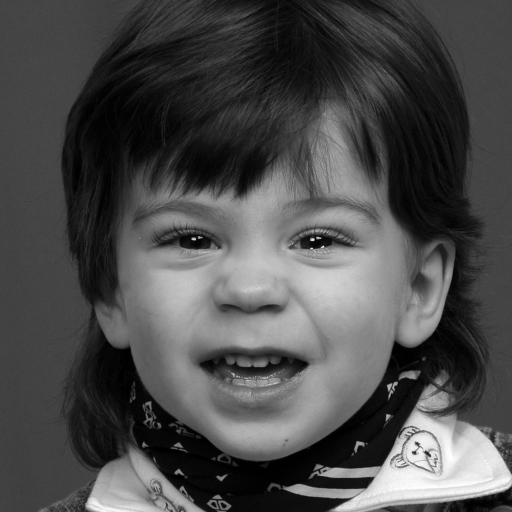

In [4]:
# Prévia dos tensores de um lote
for lote in ds_treino.take(1):
    
    for img in lote:
        
        print(img)
        display(array_to_img(img))

tf.Tensor(
[[[0.85294116 0.5627451  0.37058824]
  [0.845098   0.55588233 0.36666667]
  [0.85294116 0.5637255  0.37843138]
  ...
  [0.7882353  0.8117647  0.8039216 ]
  [0.7892157  0.8137255  0.80588233]
  [0.79019606 0.8156863  0.80784315]]

 [[0.85784316 0.5686275  0.3764706 ]
  [0.8490196  0.5656863  0.37156862]
  [0.8480392  0.5598039  0.3735294 ]
  ...
  [0.78431374 0.81764704 0.80588233]
  [0.78431374 0.81960785 0.80784315]
  [0.78431374 0.82058823 0.8088235 ]]

 [[0.85784316 0.5754902  0.3754902 ]
  [0.8509804  0.5617647  0.36862746]
  [0.8401961  0.55       0.35784313]
  ...
  [0.7862745  0.8215686  0.8098039 ]
  [0.7852941  0.82058823 0.8088235 ]
  [0.78039217 0.8156863  0.8039216 ]]

 ...

 [[0.5872549  0.40392157 0.2372549 ]
  [0.57843137 0.38921568 0.23529412]
  [0.5764706  0.37843138 0.22647059]
  ...
  [0.0882353  0.09117647 0.09901961]
  [0.08921569 0.09117647 0.1       ]
  [0.0882353  0.09117647 0.09215686]]

 [[0.6372549  0.43823528 0.25392157]
  [0.63529414 0.43039215 0

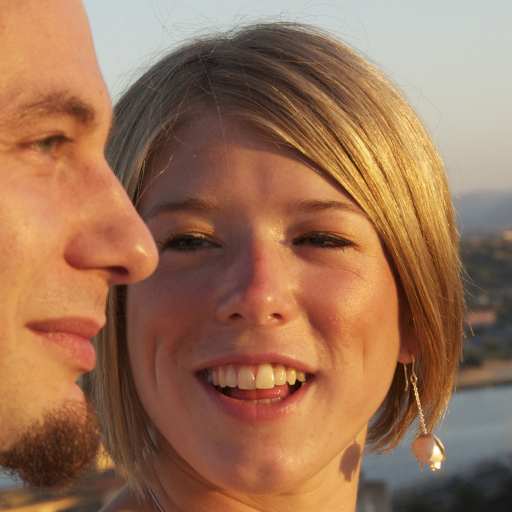

tf.Tensor(
[[[0.5833333  0.60784316 0.5617647 ]
  [0.58137256 0.6019608  0.5568628 ]
  [0.57254905 0.6009804  0.5539216 ]
  ...
  [0.7882353  0.85490197 0.88235295]
  [0.7823529  0.8480392  0.8754902 ]
  [0.7794118  0.84411764 0.8715686 ]]

 [[0.59313726 0.6068627  0.5647059 ]
  [0.59117645 0.6        0.5637255 ]
  [0.5892157  0.5980392  0.56078434]
  ...
  [0.7794118  0.85       0.87647057]
  [0.777451   0.84411764 0.8715686 ]
  [0.7764706  0.84117645 0.8686274 ]]

 [[0.5921569  0.5990196  0.5656863 ]
  [0.595098   0.5990196  0.5637255 ]
  [0.595098   0.59705883 0.5617647 ]
  ...
  [0.78431374 0.85294116 0.8754902 ]
  [0.7794118  0.84607846 0.87352943]
  [0.777451   0.84117645 0.8637255 ]]

 ...

 [[0.7323529  0.7323529  0.7254902 ]
  [0.73137254 0.73137254 0.72843134]
  [0.7323529  0.7323529  0.7245098 ]
  ...
  [0.7        0.68921566 0.65294117]
  [0.7        0.6852941  0.6480392 ]
  [0.69411767 0.6852941  0.6431373 ]]

 [[0.7254902  0.73039216 0.7254902 ]
  [0.72745097 0.72843134 0

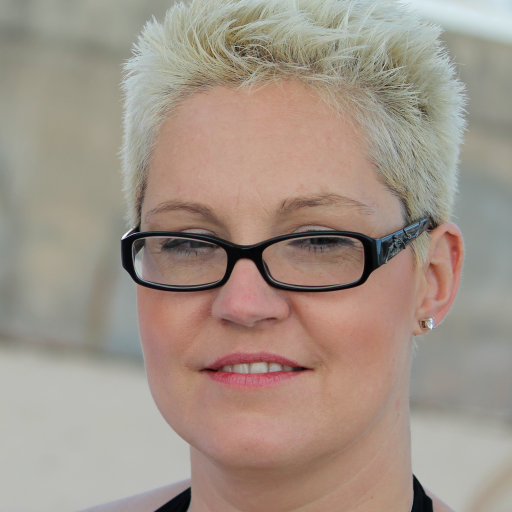

tf.Tensor(
[[[0.37254903 0.4117647  0.36862746]
  [0.36764705 0.40686274 0.36372548]
  [0.3745098  0.4137255  0.37058824]
  ...
  [0.51666665 0.56764704 0.4970588 ]
  [0.5147059  0.5656863  0.49509802]
  [0.50392157 0.55490196 0.48431373]]

 [[0.37254903 0.4117647  0.36862746]
  [0.37058824 0.40980393 0.36666667]
  [0.36666667 0.40588236 0.3627451 ]
  ...
  [0.50784314 0.5588235  0.4882353 ]
  [0.5147059  0.5656863  0.49607843]
  [0.51666665 0.56764704 0.5009804 ]]

 [[0.37156862 0.4107843  0.36568627]
  [0.36960784 0.40882352 0.36568627]
  [0.36372548 0.40294117 0.35980392]
  ...
  [0.5127451  0.55784315 0.49411765]
  [0.5137255  0.55784315 0.49411765]
  [0.5147059  0.56078434 0.49607843]]

 ...

 [[0.25490198 0.3254902  0.33333334]
  [0.24705882 0.31764707 0.3254902 ]
  [0.25686276 0.327451   0.33529413]
  ...
  [0.6735294  0.71666664 0.70098037]
  [0.6666667  0.70980394 0.69411767]
  [0.6764706  0.71960783 0.70392156]]

 [[0.26078433 0.33137256 0.3392157 ]
  [0.25196078 0.32254902 0

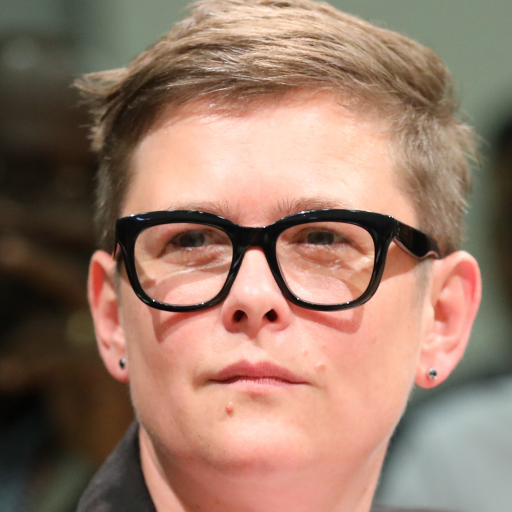

tf.Tensor(
[[[0.18235295 0.24411765 0.11666667]
  [0.2754902  0.32941177 0.21960784]
  [0.2372549  0.29215688 0.17941177]
  ...
  [0.09019608 0.1127451  0.07843138]
  [0.1        0.11568628 0.0882353 ]
  [0.10098039 0.12058824 0.09313726]]

 [[0.15784314 0.2245098  0.1127451 ]
  [0.19607843 0.2617647  0.15392157]
  [0.2637255  0.32058823 0.20686275]
  ...
  [0.09117647 0.11176471 0.08137255]
  [0.09215686 0.11176471 0.08431373]
  [0.10196079 0.11764706 0.08921569]]

 [[0.15490197 0.23235294 0.09607843]
  [0.15588236 0.23039216 0.10784314]
  [0.26666668 0.33431372 0.20686275]
  ...
  [0.09313726 0.11078431 0.08333334]
  [0.09901961 0.11078431 0.08529412]
  [0.09705883 0.10686275 0.08529412]]

 ...

 [[0.55588233 0.50686276 0.67156863]
  [0.56764704 0.5137255  0.6745098 ]
  [0.56666666 0.5156863  0.6764706 ]
  ...
  [0.6990196  0.672549   0.7921569 ]
  [0.6784314  0.6509804  0.7794118 ]
  [0.6852941  0.6519608  0.7882353 ]]

 [[0.59607846 0.55       0.69509804]
  [0.60490197 0.5598039  0

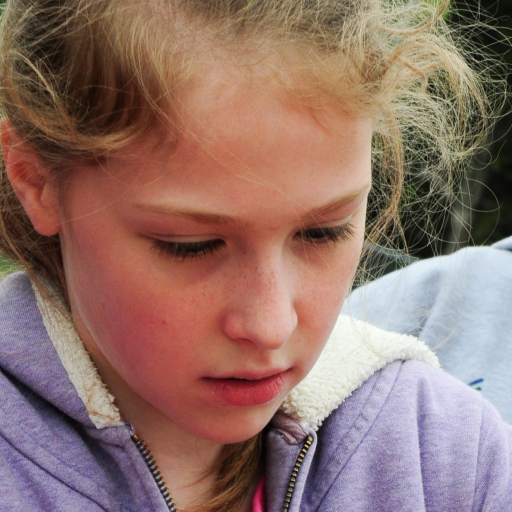

tf.Tensor(
[[[0.65686274 0.5980392  0.43823528]
  [0.654902   0.59607846 0.43529412]
  [0.6490196  0.5901961  0.42843136]
  ...
  [0.7588235  0.6970588  0.48921567]
  [0.76862746 0.7058824  0.5019608 ]
  [0.7627451  0.7        0.49607843]]

 [[0.672549   0.6137255  0.45882353]
  [0.66764706 0.60882354 0.45392156]
  [0.66764706 0.60882354 0.45294118]
  ...
  [0.75784314 0.7        0.48431373]
  [0.76666665 0.7058824  0.4970588 ]
  [0.7656863  0.7029412  0.4990196 ]]

 [[0.68235296 0.62352943 0.46862745]
  [0.6813725  0.622549   0.46862745]
  [0.68039215 0.6215686  0.46666667]
  ...
  [0.7529412  0.69411767 0.47941175]
  [0.7588235  0.7        0.48431373]
  [0.7617647  0.7        0.49313724]]

 ...

 [[0.8382353  0.8656863  0.90392154]
  [0.8352941  0.87058824 0.90588236]
  [0.8372549  0.872549   0.9078431 ]
  ...
  [0.81764704 0.6745098  0.6754902 ]
  [0.7627451  0.6254902  0.61960787]
  [0.75       0.627451   0.6166667 ]]

 [[0.8382353  0.8617647  0.9078431 ]
  [0.83431375 0.8686274  0

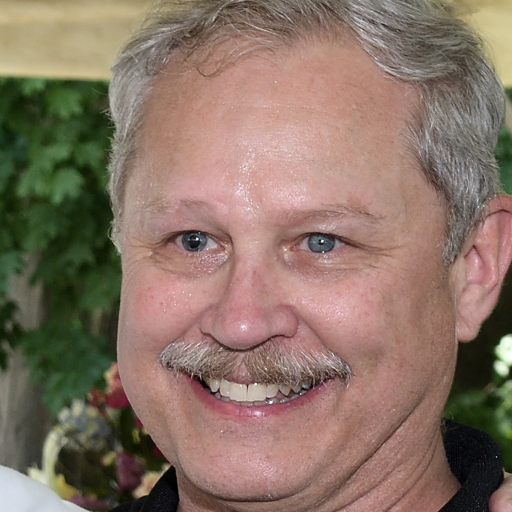

tf.Tensor(
[[[0.18039216 0.14607844 0.13431373]
  [0.1872549  0.14705883 0.14117648]
  [0.16764706 0.14215687 0.1382353 ]
  ...
  [0.31176472 0.24607843 0.1509804 ]
  [0.28137255 0.22745098 0.15784314]
  [0.26568627 0.22941177 0.16176471]]

 [[0.16862746 0.1509804  0.16666667]
  [0.17450981 0.14705883 0.14215687]
  [0.17058824 0.14901961 0.13627452]
  ...
  [0.30980393 0.24215686 0.1509804 ]
  [0.2882353  0.2382353  0.16568628]
  [0.2647059  0.22843137 0.16078432]]

 [[0.16960785 0.14705883 0.15196079]
  [0.1754902  0.15       0.1392157 ]
  [0.16960785 0.15       0.13039216]
  ...
  [0.31960785 0.2509804  0.1509804 ]
  [0.29411766 0.23333333 0.14901961]
  [0.28333333 0.22647059 0.15294118]]

 ...

 [[0.20980392 0.21470588 0.24607843]
  [0.2901961  0.31176472 0.33529413]
  [0.34607843 0.3745098  0.40588236]
  ...
  [0.29803923 0.29117647 0.30980393]
  [0.327451   0.31960785 0.33235294]
  [0.3509804  0.35196078 0.35980392]]

 [[0.1872549  0.21078432 0.23235294]
  [0.21666667 0.24117647 0

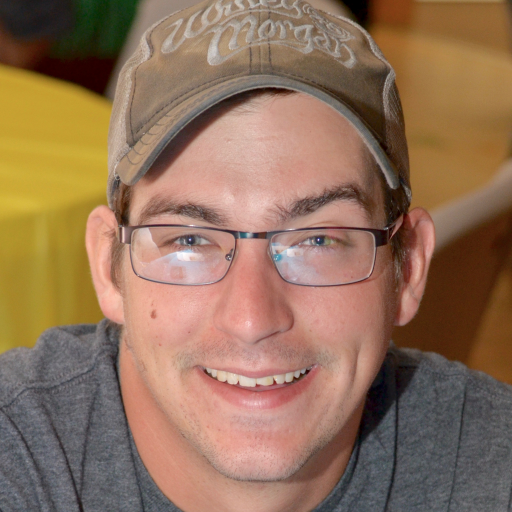

tf.Tensor(
[[[1.         0.73333335 0.5294118 ]
  [1.         0.73333335 0.5294118 ]
  [1.         0.73333335 0.53333336]
  ...
  [1.         0.5764706  0.41568628]
  [1.         0.5764706  0.4137255 ]
  [1.         0.5764706  0.4117647 ]]

 [[1.         0.73333335 0.5294118 ]
  [1.         0.73333335 0.5294118 ]
  [1.         0.73333335 0.53333336]
  ...
  [1.         0.5764706  0.41568628]
  [1.         0.5764706  0.4137255 ]
  [1.         0.5754902  0.4117647 ]]

 [[1.         0.73333335 0.5294118 ]
  [1.         0.73333335 0.5294118 ]
  [1.         0.73333335 0.53333336]
  ...
  [1.         0.5764706  0.41470587]
  [1.         0.5764706  0.4117647 ]
  [1.         0.57254905 0.4117647 ]]

 ...

 [[0.99607843 0.4392157  0.34509805]
  [0.9980392  0.44117647 0.34705883]
  [0.99509805 0.43823528 0.34411764]
  ...
  [0.09803922 0.09019608 0.09411765]
  [0.10098039 0.09313726 0.09705883]
  [0.10490196 0.09705883 0.09901961]]

 [[0.99509805 0.44019607 0.34215686]
  [0.9941176  0.4392157  0

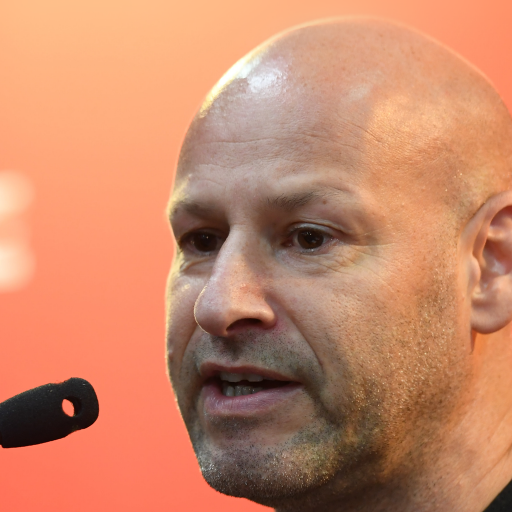

tf.Tensor(
[[[0.7        0.39509803 0.20294118]
  [0.6764706  0.37254903 0.17450981]
  [0.68921566 0.38333333 0.18137255]
  ...
  [0.44509804 0.1627451  0.07745098]
  [0.4480392  0.16568628 0.07843138]
  [0.44705883 0.16470589 0.07843138]]

 [[0.69215685 0.39019608 0.19607843]
  [0.69411767 0.39019608 0.19607843]
  [0.6872549  0.3852941  0.18137255]
  ...
  [0.46470588 0.17450981 0.08529412]
  [0.46764705 0.17352942 0.09019608]
  [0.47549018 0.17843138 0.09411765]]

 [[0.6882353  0.38627452 0.18529412]
  [0.6872549  0.38333333 0.18431373]
  [0.68921566 0.3872549  0.18333334]
  ...
  [0.47745097 0.17941177 0.0882353 ]
  [0.46568626 0.16568628 0.08333334]
  [0.46666667 0.16666667 0.08529412]]

 ...

 [[0.25882354 0.11568628 0.07450981]
  [0.24215686 0.10882353 0.06862745]
  [0.28529412 0.15       0.11176471]
  ...
  [0.16568628 0.08529412 0.02843137]
  [0.18333334 0.08431373 0.02941176]
  [0.17745098 0.07450981 0.01960784]]

 [[0.2784314  0.13235295 0.09019608]
  [0.25882354 0.1127451  0

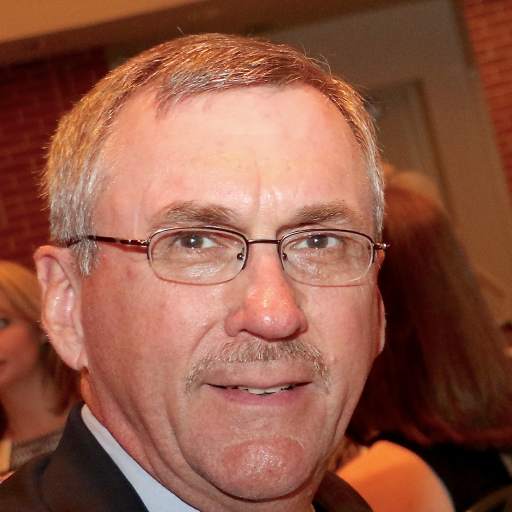

In [5]:
# Realizando o redimensionamento dos tensores
def redimensionar(array_img):
    return array_img / 255

ds_treino = ds_treino.map(redimensionar)
ds_validacao = ds_validacao.map(redimensionar)


# Prévia dos tensores do lote processado
for lote in ds_treino.take(1):
    for img in lote:
        print(img)
        display(array_to_img(img))

In [6]:
# Recuperar todos os arquivos para teste
imagens_test = os.path.abspath(os.path.join(dir_raiz, "test"))

caminho_imagens_teste: list = []
for imgs in os.listdir(imagens_test):
    final_caminho: str = os.path.join(imagens_test, imgs)
    caminho_imagens_teste.append(final_caminho)
    
caminho_imagens_teste

['/home/dangelo/dev/TCC/image-resolution/src/images_train/test/36734.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/36817.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/36702.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/35996.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/35986.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/36717.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/36761.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/36826.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/36811.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/36744.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/36624.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/36619.png',
 '/home/dangelo/dev/TCC/image-resolution/src/images_train/test/35978.png',
 '/home/dangelo/dev/TCC/i

### Passo 2: Separando elementos de entrada(inputs) e do objetivo a ser conquistado(targets)

Pelo fato de termos declarado `label_mode=None` ao criar o dataset, não temos uma divisão clara das inputs e targets de nossa rede neural. O objetivo desse passo é processar as entradas e saídas de acordo com que:

    * Entradas:
        ** Serão redimensionadas com a variável de tamanho de entrada, declarada no início do método.
        ** Serão convertidas para escala de cinza, via o padrão de cor YUV.
    
    * Targets:
        ** Serão apenas convertidos para escala de cinza via YUV.
        
Na imagem abaixo, temos o estado atual do dataset à esquerda; e após o Passo 2, o dataset devidamente dividido à direita.
       
![title](./dataset_split.png)

In [ ]:
# Processando inputs
def processa_entrada(imagem, tamanho_entrada):
    entrada = tf.image.rgb_to_yuv(imagem)
    eixo_dimensao_cores = len(entrada.shape) - 1 #(512, 512, 3) => seleciona o 3
    y, u, v = tf.split(entrada, 3, eixo_dimensao_cores)
    return 

### OBSERVAÇÃO: CONSTRUIR O DATASET CINZA E REFATORAR OS MÉTODOS PROCESSA_ENTRADA E RETIRAR O MÉTODO PROCESSA_TARGET.

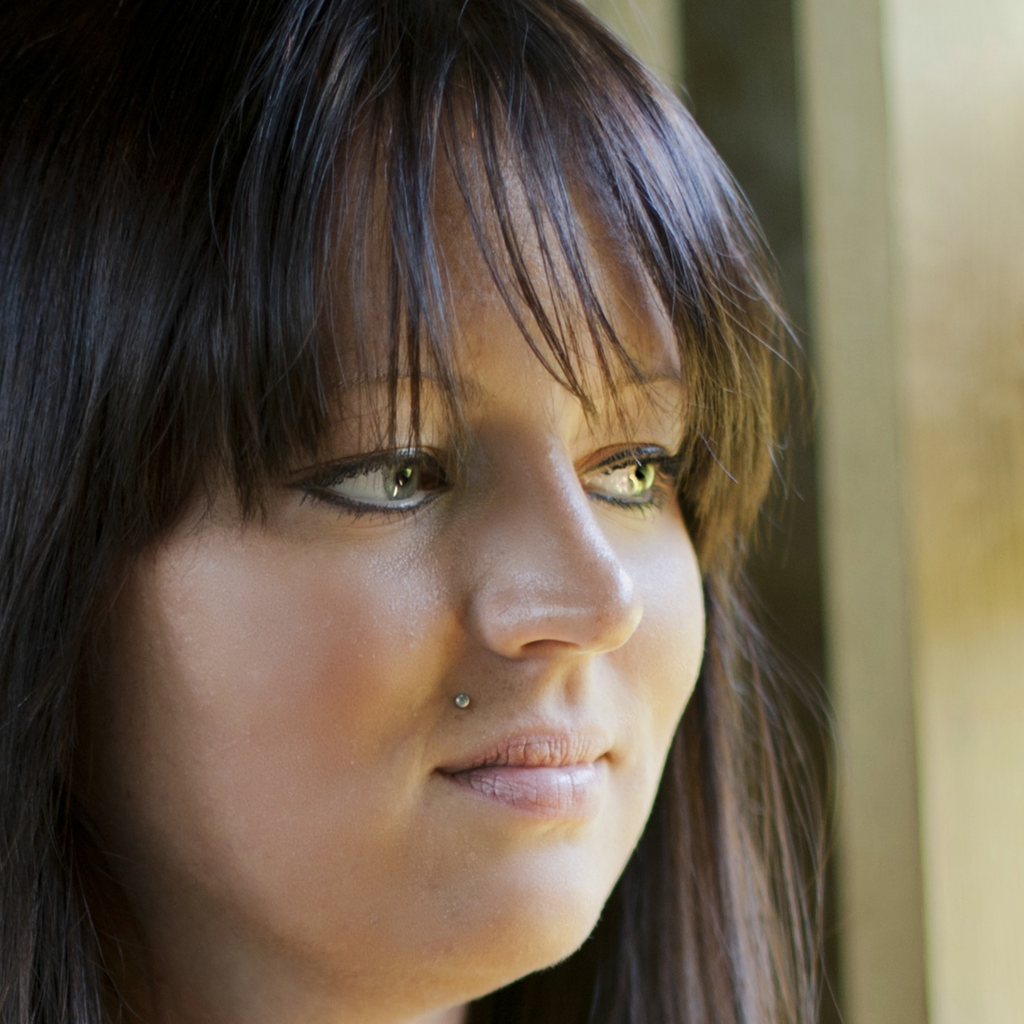

In [7]:
caminho_img_teste = r'{}/src/images_train/test/36734.png'.format(current_dir)

img = PIL.Image.open(caminho_img_teste)
display(img)

In [8]:
array_img_teste = img_to_array(img)
array_img_teste

array([[[  5.,   0.,   0.],
        [  6.,   2.,   0.],
        [  7.,   3.,   0.],
        ...,
        [215., 218., 201.],
        [215., 218., 201.],
        [215., 218., 201.]],

       [[  5.,   1.,   0.],
        [  6.,   2.,   0.],
        [  8.,   5.,   2.],
        ...,
        [215., 218., 201.],
        [215., 218., 201.],
        [215., 218., 201.]],

       [[  8.,   4.,   1.],
        [  6.,   3.,   0.],
        [  6.,   4.,   1.],
        ...,
        [215., 218., 201.],
        [215., 218., 201.],
        [215., 218., 201.]],

       ...,

       [[ 41.,  35.,  31.],
        [ 36.,  31.,  27.],
        [ 35.,  32.,  28.],
        ...,
        [211., 202., 169.],
        [211., 202., 169.],
        [211., 202., 169.]],

       [[ 42.,  36.,  31.],
        [ 38.,  33.,  28.],
        [ 37.,  33.,  29.],
        ...,
        [211., 202., 169.],
        [210., 201., 168.],
        [210., 201., 168.]],

       [[ 42.,  36.,  31.],
        [ 38.,  33.,  28.],
        [ 37.,  

In [10]:
array_cinza = tf.image.rgb_to_grayscale(array_img_teste)
array_cinza

<tf.Tensor: shape=(1024, 1024, 1), dtype=float32, numpy=
array([[[  1.4945 ],
        [  2.9674 ],
        [  3.8533 ],
        ...,
        [215.14351],
        [215.14351],
        [215.14351]],

       [[  2.0815 ],
        [  2.9674 ],
        [  5.5542 ],
        ...,
        [215.14351],
        [215.14351],
        [215.14351]],

       [[  4.8532 ],
        [  3.5544 ],
        [  4.2554 ],
        ...,
        [215.14351],
        [215.14351],
        [215.14351]],

       ...,

       [[ 36.3339 ],
        [ 32.0354 ],
        [ 32.4375 ],
        ...,
        [200.90791],
        [200.90791],
        [200.90791]],

       [[ 37.2198 ],
        [ 33.9212 ],
        [ 33.7363 ],
        ...,
        [200.90791],
        [199.90799],
        [199.90799]],

       [[ 37.2198 ],
        [ 33.9212 ],
        [ 33.1493 ],
        ...,
        [200.90791],
        [199.90799],
        [198.9081 ]]], dtype=float32)>

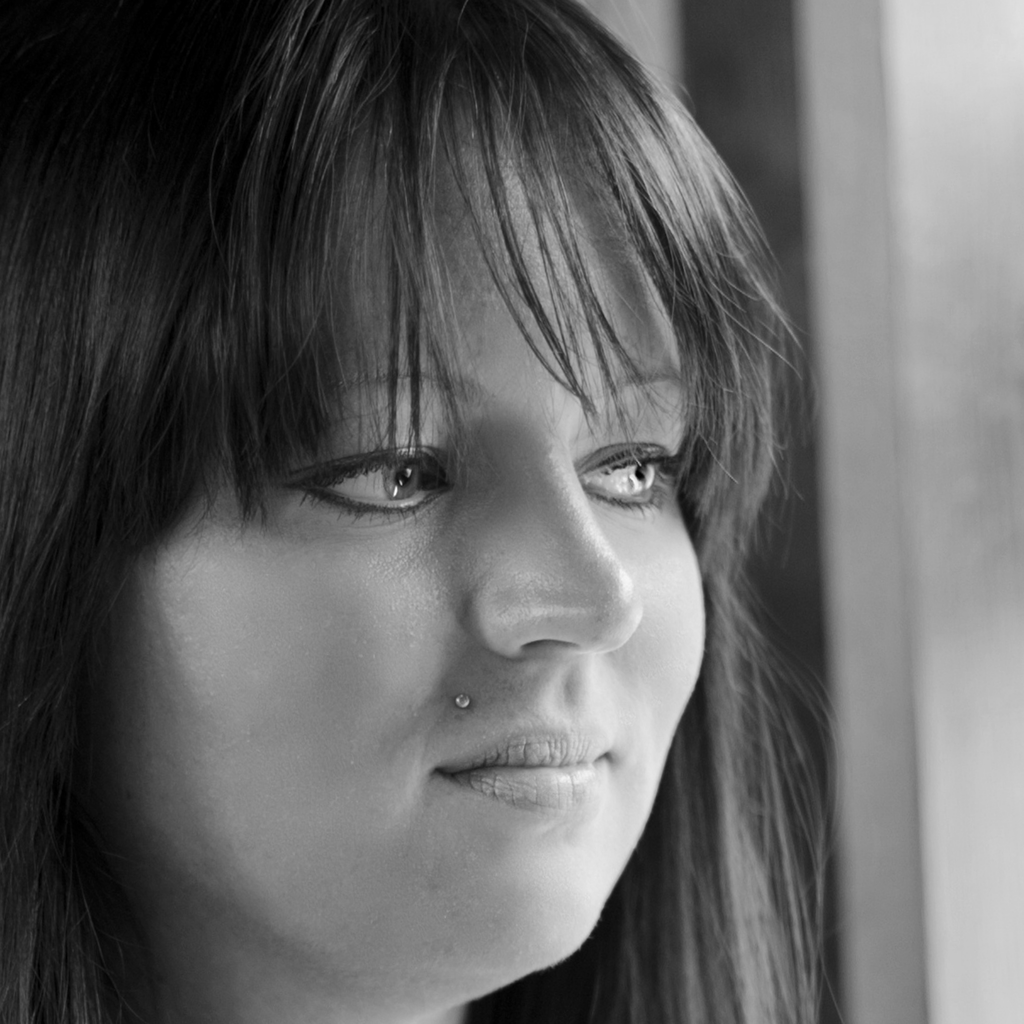

In [12]:
display(array_to_img(array_cinza))

In [14]:
array_transformado = tf.image.grayscale_to_rgb(array_cinza)
array_transformado

<tf.Tensor: shape=(1024, 1024, 3), dtype=float32, numpy=
array([[[  1.4945 ,   1.4945 ,   1.4945 ],
        [  2.9674 ,   2.9674 ,   2.9674 ],
        [  3.8533 ,   3.8533 ,   3.8533 ],
        ...,
        [215.14351, 215.14351, 215.14351],
        [215.14351, 215.14351, 215.14351],
        [215.14351, 215.14351, 215.14351]],

       [[  2.0815 ,   2.0815 ,   2.0815 ],
        [  2.9674 ,   2.9674 ,   2.9674 ],
        [  5.5542 ,   5.5542 ,   5.5542 ],
        ...,
        [215.14351, 215.14351, 215.14351],
        [215.14351, 215.14351, 215.14351],
        [215.14351, 215.14351, 215.14351]],

       [[  4.8532 ,   4.8532 ,   4.8532 ],
        [  3.5544 ,   3.5544 ,   3.5544 ],
        [  4.2554 ,   4.2554 ,   4.2554 ],
        ...,
        [215.14351, 215.14351, 215.14351],
        [215.14351, 215.14351, 215.14351],
        [215.14351, 215.14351, 215.14351]],

       ...,

       [[ 36.3339 ,  36.3339 ,  36.3339 ],
        [ 32.0354 ,  32.0354 ,  32.0354 ],
        [ 32.4375 ,  32.4

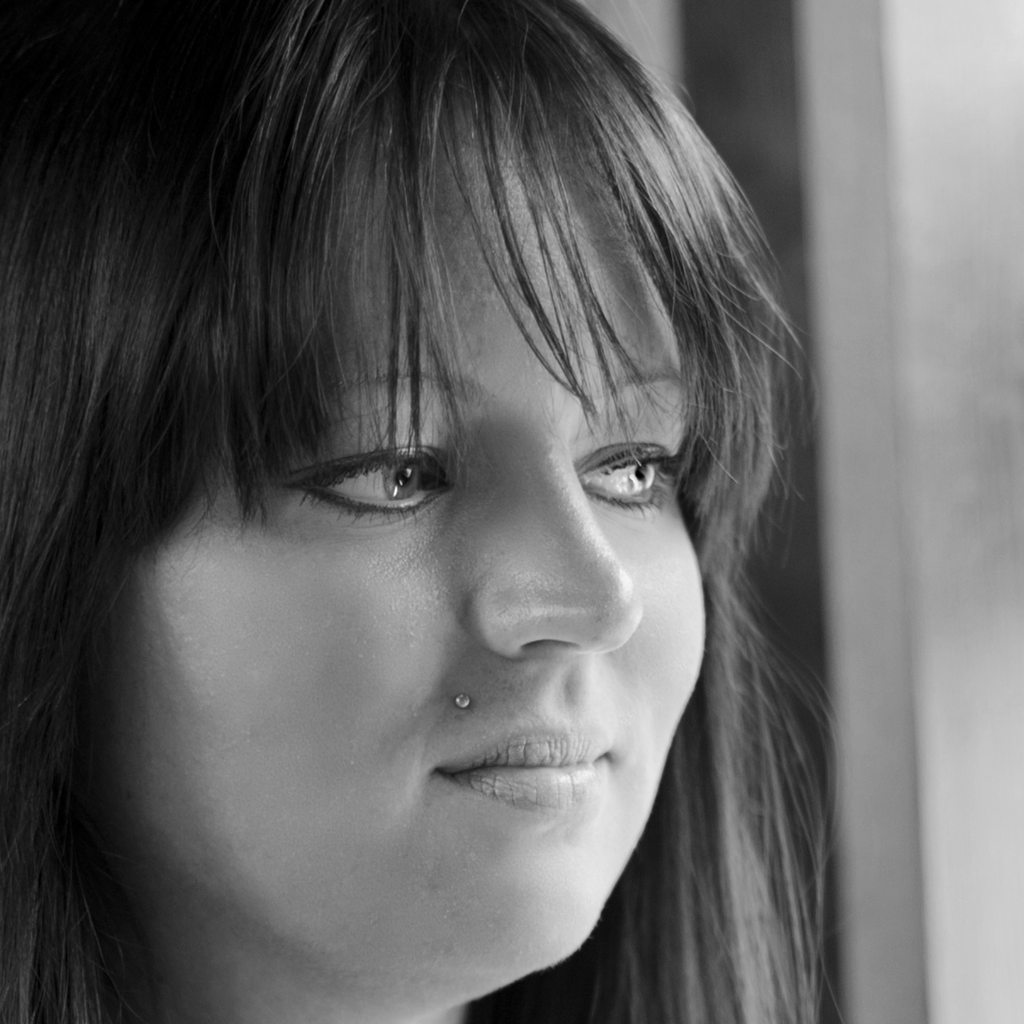

In [13]:
display(array_to_img(tf.image.grayscale_to_rgb(array_cinza)))

In [1]:
tupla1 = (1, 2)

In [2]:
tupla1

(1, 2)

In [3]:
type(tupla1)

tuple